### FINAL PLOTS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

In [2]:
plt.style.use("seaborn-v0_8")

In [3]:
def load_panel(path):
    df = pd.read_csv(path, index_col=0, parse_dates=True)
    df.index.name = "date"
    return df.sort_index()

In [ ]:
# EQUITY 
m1_eq = load_panel(r"E:\data\Model1_data\equity_curves_monthly.csv")
m2_eq = load_panel(r"E:\data\Model2_data\equity_curves_monthly.csv")
m3_eq = load_panel(r"E:\data\Model3_data\equity_curves_monthly.csv")
m4_eq = load_panel(r"E:\data\Model4_data\equity_curves_monthly.csv")

# RETURNS
m1_ret = load_panel(r"E:\data\Model1_data\returns_monthly.csv")
m2_ret = load_panel(r"E:\data\Model2_data\returns_monthly.csv")
m3_ret = load_panel(r"E:\data\Model3_data\returns_monthly.csv")
m4_ret = load_panel(r"E:\data\Model4_data\returns_monthly.csv")

# DD
m1_dd = load_panel(r"E:\data\Model1_data\drawdowns_monthly.csv")
m2_dd = load_panel(r"E:\data\Model2_data\drawdowns_monthly.csv")
m3_dd = load_panel(r"E:\data\Model3_data\drawdowns_monthly.csv")
m4_dd = load_panel(r"E:\data\Model4_data\drawdowns_monthly_all.csv")

# WEIGHTS
w1 = load_panel(r"E:\data\Model1_data\weights_esn_model1_monthly.csv")
w2 = load_panel(r"E:\data\Model2_data\weights_esn_model2_monthly.csv")
w3 = load_panel(r"E:\data\Model3_data\weights_resnet_monthly.csv")
w4 = load_panel(r"E:\data\Model4_data\weights_monthly.csv")

In [5]:
# Equity curves panel
eq_all = pd.concat([
    m1_eq.add_suffix("_M1"),
    m2_eq.add_suffix("_M2"),
    m3_eq.add_suffix("_M3"),
    m4_eq.add_suffix("_M4"),
], axis=1).round(3)

#Returns panel
ret_all = pd.concat([
    m1_ret.add_suffix("_M1"),
    m2_ret.add_suffix("_M2"),
    m3_ret.add_suffix("_M3"),
    m4_ret.add_suffix("_M4"),
], axis=1).round(3)

# DD panel
dd_all = pd.concat([
    m1_dd.add_suffix("_M1"),
    m2_dd.add_suffix("_M2"),
    m3_dd.add_suffix("_M3"),
    m4_dd.add_suffix("_M4"),
], axis=1).round(3)

# Weights panel
w_all = pd.concat([
    w1.add_suffix("_M1"),
    w2.add_suffix("_M2"),
    w3.add_suffix("_M3"),
    w4.add_suffix("_M4"),
], axis=1).round(3)

In [6]:
print("Equity panel:", eq_all.shape)
print("Returns panel:", ret_all.shape)
print("DD panel:", dd_all.shape)
print("Weights panel:", w_all.shape)

Equity panel: (87, 16)
Returns panel: (87, 16)
DD panel: (87, 16)
Weights panel: (82, 40)


<Figure size 1200x600 with 0 Axes>

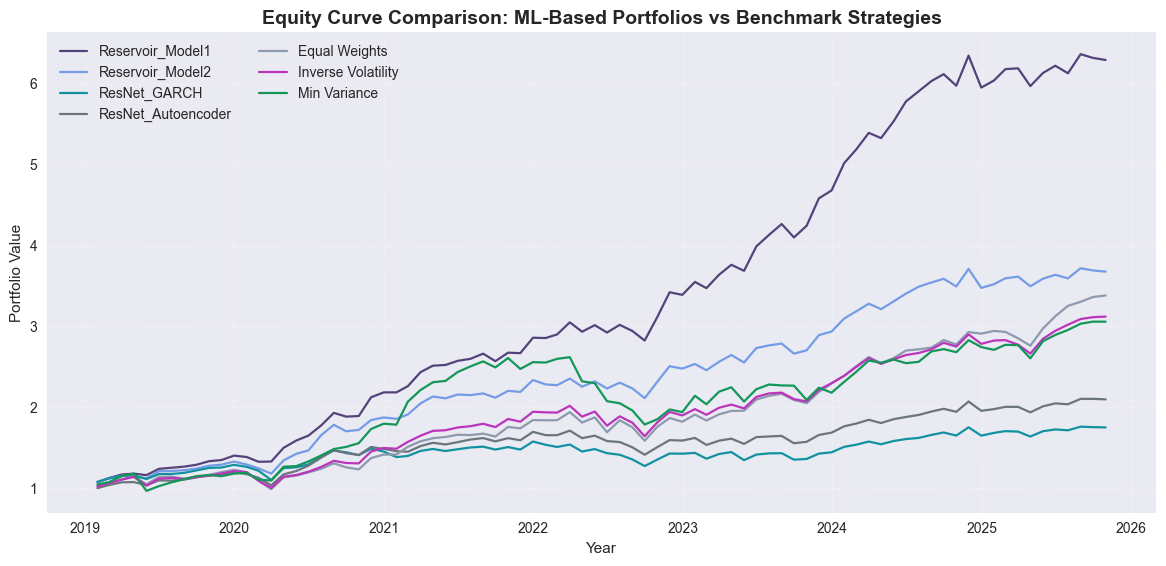

In [ ]:
ml_cols = ["ESN_Model1_M1","ESN_Model2_M2","ResNet_M3","Hybrid_M4"]
bench_cols = ["EW_M1","IVOL_M1","MVP_M1"]
plot_df = eq_all[ml_cols + bench_cols].copy()
plot_df = plot_df.dropna()
plt.figure(figsize=(12,6))

label_map = {
    "ESN_Model1_M1": "Reservoir_Model1",
    "ESN_Model2_M2": "Reservoir_Model2",
    "ResNet_M3": "ResNet_GARCH",
    "Hybrid_M4": "ResNet_Autoencoder",
    "EW_M1": "Equal Weights",
    "IVOL_M1": "Inverse Volatility",
    "MVP_M1": "Min Variance"
}

palette = [
    "#54437A", 
    "#749CE6", 
    "#1292A0",  
    "#6C757D",  
    "#8D99AE",  
    "#BB34BB",  
    "#139759" 
]

plt.figure(figsize=(12,6))

for i,c in enumerate(ml_cols):
    sns.lineplot(data=plot_df[c],linewidth=1.6,label=label_map[c],color=palette[i],linestyle="-")

for j,c in enumerate(bench_cols):
    sns.lineplot(data=plot_df[c],linewidth=1.6,label=label_map[c],color=palette[len(ml_cols)+j])

plt.title("Equity Curve Comparison: ML-Based Portfolios vs Benchmark Strategies",fontsize=14,fontweight="bold")
plt.ylabel("Portfolio Value")
plt.xlabel("Year")
plt.grid(True, alpha=0.25, linestyle="--")
plt.legend(fontsize=10,frameon=False,ncol=2,loc="upper left")
plt.tight_layout()
plt.show()

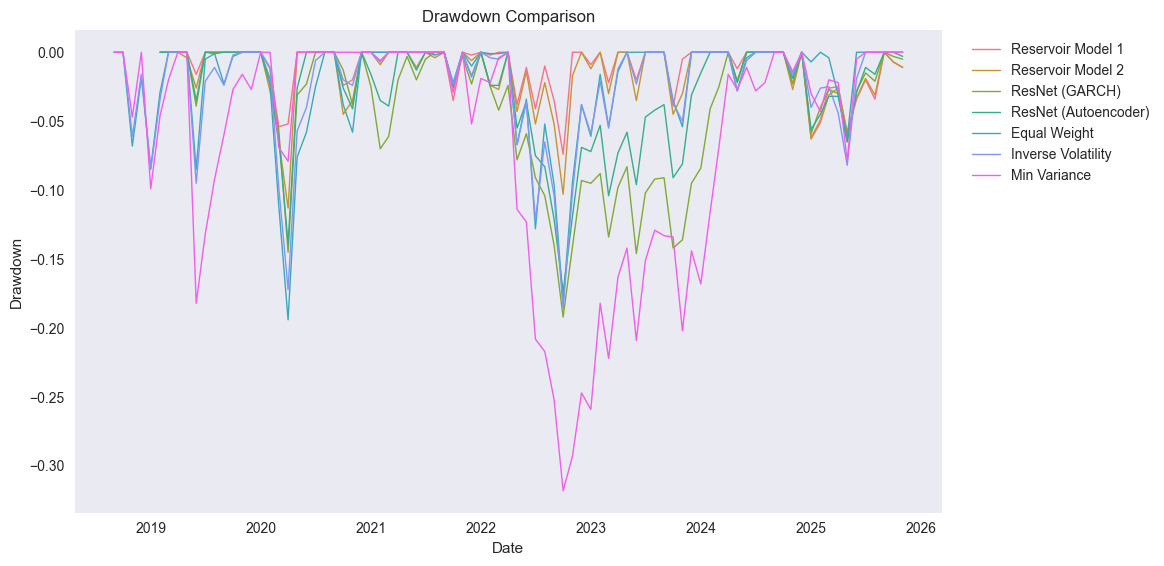

In [ ]:
cols = [
    "ESN_Model1_M1",
    "ESN_Model2_M2",
    "ResNet_M3",
    "Hybrid_M4",
    "EW_M1",
    "IVOL_M1",
    "MVP_M1"
]

label_map = {
    "ESN_Model1_M1": "Reservoir Model 1",
    "ESN_Model2_M2": "Reservoir Model 2",
    "ResNet_M3": "ResNet (GARCH)",
    "Hybrid_M4": "ResNet (Autoencoder)",
    "EW_M1": "Equal Weight",
    "IVOL_M1": "Inverse Volatility",
    "MVP_M1": "Min Variance"
}

plot_df = dd_all[cols].rename(columns=label_map)
plt.figure(figsize=(12,6))
sns.lineplot(data=plot_df, linewidth=1,dashes=False)
plt.title("Drawdown Comparison")
plt.ylabel("Drawdown")
plt.xlabel("Date")
plt.grid(False)
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout()
plt.show()

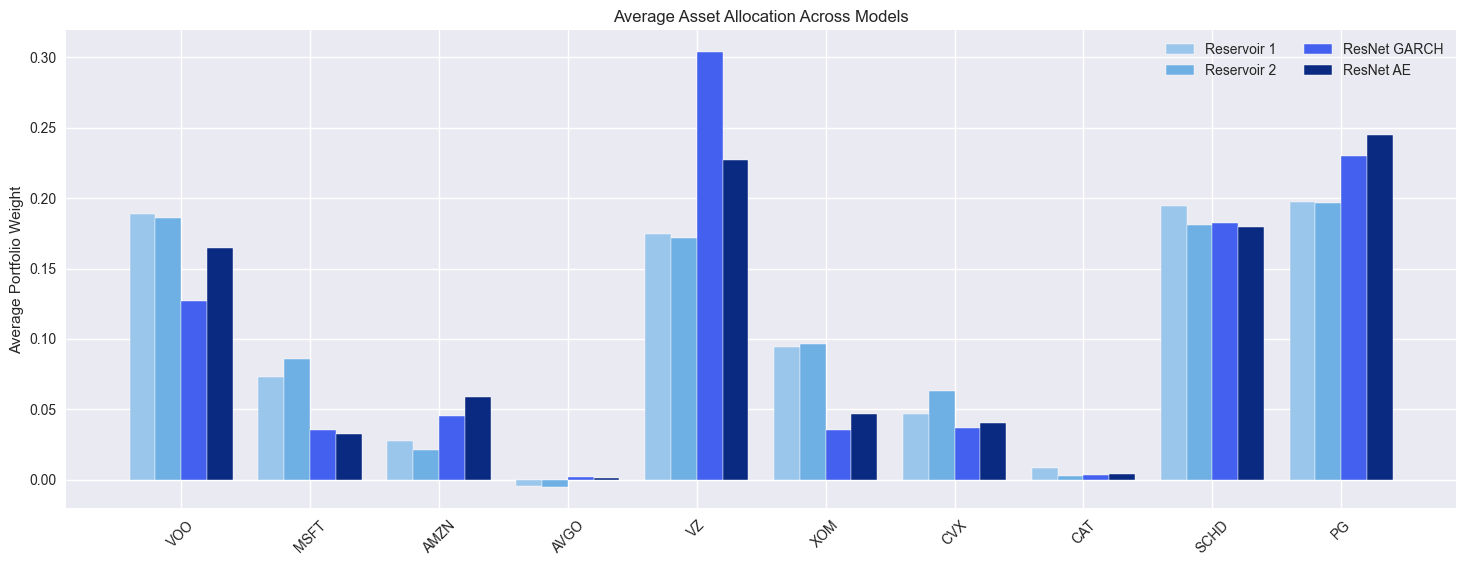

In [11]:
import numpy as np
import matplotlib.pyplot as plt
sns.color_palette("Blues", as_cmap=True)
assets = ["VOO","MSFT","AMZN","AVGO","VZ","XOM","CVX","CAT","SCHD","PG"]

# mean weights
mw1 = w1[assets].mean()
mw2 = w2[assets].mean()
mw3 = w3[assets].mean()
mw4 = w4[assets].mean()
x = np.arange(len(assets))
width = 0.2
plt.figure(figsize=(15,6))
plt.bar(x - 1.5*width, mw1, width, label="Reservoir 1", color="#9AC6EB")
plt.bar(x - 0.5*width, mw2, width, label="Reservoir 2", color="#6EAFE4")
plt.bar(x + 0.5*width, mw3, width, label="ResNet GARCH", color="#4361EE")
plt.bar(x + 1.5*width, mw4, width, label="ResNet AE", color="#0A2A81")
plt.xticks(x, assets, rotation=45)
plt.ylabel("Average Portfolio Weight")
plt.title("Average Asset Allocation Across Models")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

In [12]:
palette = [
    "#E2609A", 
    "#8A0AE0",  
    "#60537C",  
    "#4361EE",  
    "#4CC9F0",  
    "#4895EF",  
    "#B5179E"  
]

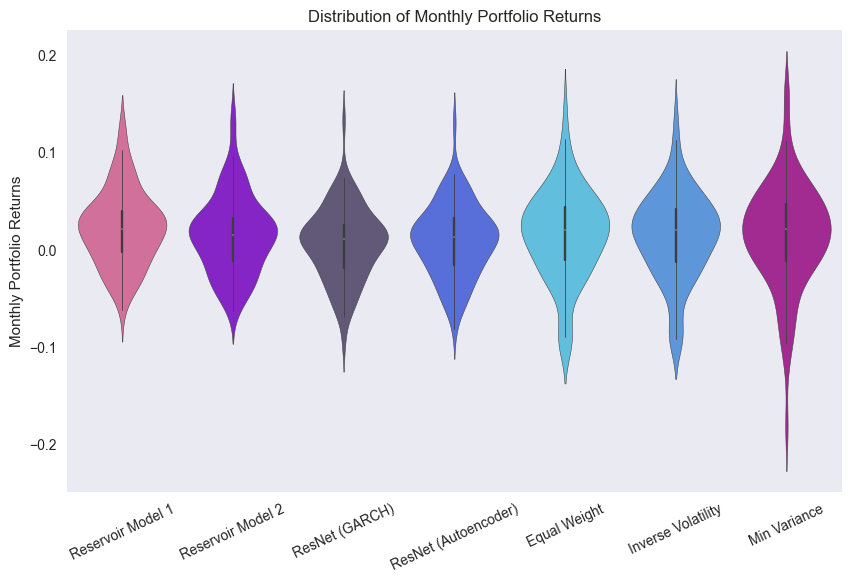

In [ ]:
cols = [
    "ESN_Model1_M1",
    "ESN_Model2_M2",
    "ResNet_M3",
    "Hybrid_M4",
    "EW_M1",
    "IVOL_M1",
    "MVP_M1"
]

label_map = {
    "ESN_Model1_M1": "Reservoir Model 1",
    "ESN_Model2_M2": "Reservoir Model 2",
    "ResNet_M3": "ResNet (GARCH)",
    "Hybrid_M4": "ResNet (Autoencoder)",
    "EW_M1": "Equal Weight",
    "IVOL_M1": "Inverse Volatility",
    "MVP_M1": "Min Variance"
}

df = ret_all[cols].dropna()
df = df.rename(columns=label_map)

plt.figure(figsize=(10,6))
sns.violinplot(data=df, inner="box", palette=palette,)
plt.ylabel("Monthly Portfolio Returns")
plt.title("Distribution of Monthly Portfolio Returns")
plt.xticks(rotation=25)
plt.grid(False)
plt.show()

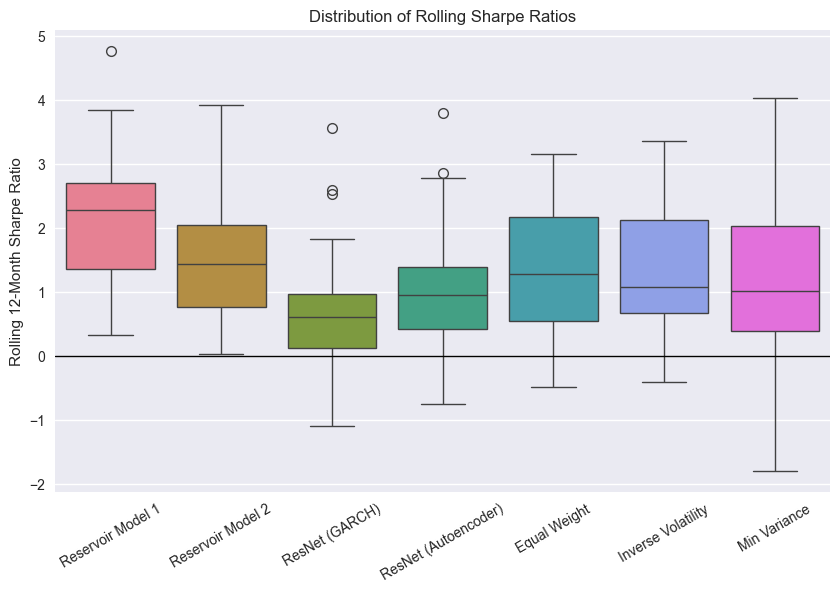

In [ ]:
def rolling_sharpe(r, window=12):
    roll_mean = r.rolling(window).mean()
    roll_std  = r.rolling(window).std()
    sharpe = (roll_mean / roll_std) * np.sqrt(12)
    return sharpe

cols = [
    "ESN_Model1_M1",
    "ESN_Model2_M2",
    "ResNet_M3",
    "Hybrid_M4",
    "EW_M1",
    "IVOL_M1",
    "MVP_M1"
]

label_map = {
    "ESN_Model1_M1": "Reservoir Model 1",
    "ESN_Model2_M2": "Reservoir Model 2",
    "ResNet_M3": "ResNet (GARCH)",
    "Hybrid_M4": "ResNet (Autoencoder)",
    "EW_M1": "Equal Weight",
    "IVOL_M1": "Inverse Volatility",
    "MVP_M1": "Min Variance"
}

rs_df = pd.DataFrame()

for c in cols:
    rs_df[label_map[c]] = rolling_sharpe(ret_all[c])

rs_df = rs_df.dropna()
plt.figure(figsize=(10,6))
sns.boxplot(data=rs_df)
plt.axhline(0, color="black", linewidth=1)
plt.ylabel("Rolling 12-Month Sharpe Ratio")
plt.title("Distribution of Rolling Sharpe Ratios")
plt.xticks(rotation=30)
plt.show()

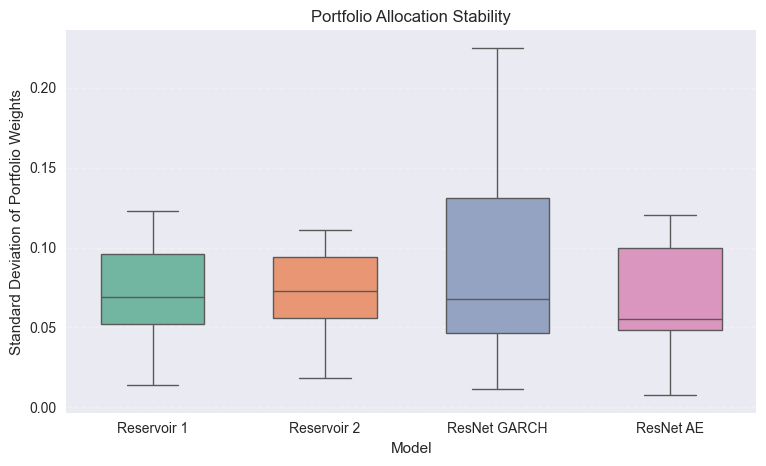

In [ ]:
plt.figure(figsize=(8,5))

alloc_std_df = pd.DataFrame({
    "Reservoir 1": w1.std(),
    "Reservoir 2": w2.std(),
    "ResNet GARCH": w3.std(),
    "ResNet AE": w4.std()
})

sns.boxplot(data=alloc_std_df,palette="Set2",width=0.6)
plt.title("Portfolio Allocation Stability")
plt.ylabel("Standard Deviation of Portfolio Weights")
plt.xlabel("Model")
plt.grid(True, axis="y", alpha=0.25, linestyle="--")
plt.tight_layout()
plt.show()

In [16]:
# ============================================================
# TURNOVER — DAILY & MONTHLY (Models 1–4) IN %
# ============================================================

def compute_turnover(w_df):
    return 0.5 * w_df.diff().abs().sum(axis=1)

# -----------------------
# DAILY
# -----------------------
to_m1_d = compute_turnover(w1)
to_m2_d = compute_turnover(w2)
to_m3_d = compute_turnover(w3)
to_m4_d = compute_turnover(w4)

turnover_daily = pd.concat([
    to_m1_d.rename("Model 1"),
    to_m2_d.rename("Model 2"),
    to_m3_d.rename("Model 3"),
    to_m4_d.rename("Model 4"),
], axis=1)

# -----------------------
# MONTHLY
# -----------------------
w1_m = w1.resample("ME").last()
w2_m = w2.resample("ME").last()
w3_m = w3.resample("ME").last()
w4_m = w4.resample("ME").last()

to_m1_m = compute_turnover(w1_m)
to_m2_m = compute_turnover(w2_m)
to_m3_m = compute_turnover(w3_m)
to_m4_m = compute_turnover(w4_m)

turnover_monthly = pd.concat([
    to_m1_m.rename("Model 1"),
    to_m2_m.rename("Model 2"),
    to_m3_m.rename("Model 3"),
    to_m4_m.rename("Model 4"),
], axis=1)

# ============================================================
# SUMMARY IN %
# ============================================================

turnover_summary = pd.DataFrame({
    "TO % Daily": turnover_daily.mean()*100,
    "TO % Monthly": turnover_monthly.mean()*100,
    "Ann TO % (Daily)": turnover_daily.mean()*252*100,
    "Ann TO % (Monthly)": turnover_monthly.mean()*12*100
}).round(2)

print("\n=== TURNOVER SUMMARY (%) ===")
print(turnover_summary)


=== TURNOVER SUMMARY (%) ===
         TO % Daily  TO % Monthly  Ann TO % (Daily)  Ann TO % (Monthly)
Model 1       13.06         13.06           3291.02              156.72
Model 2       14.43         14.43           3635.45              173.12
Model 3        9.25          9.25           2330.51              110.98
Model 4       13.22         13.22           3330.73              158.61


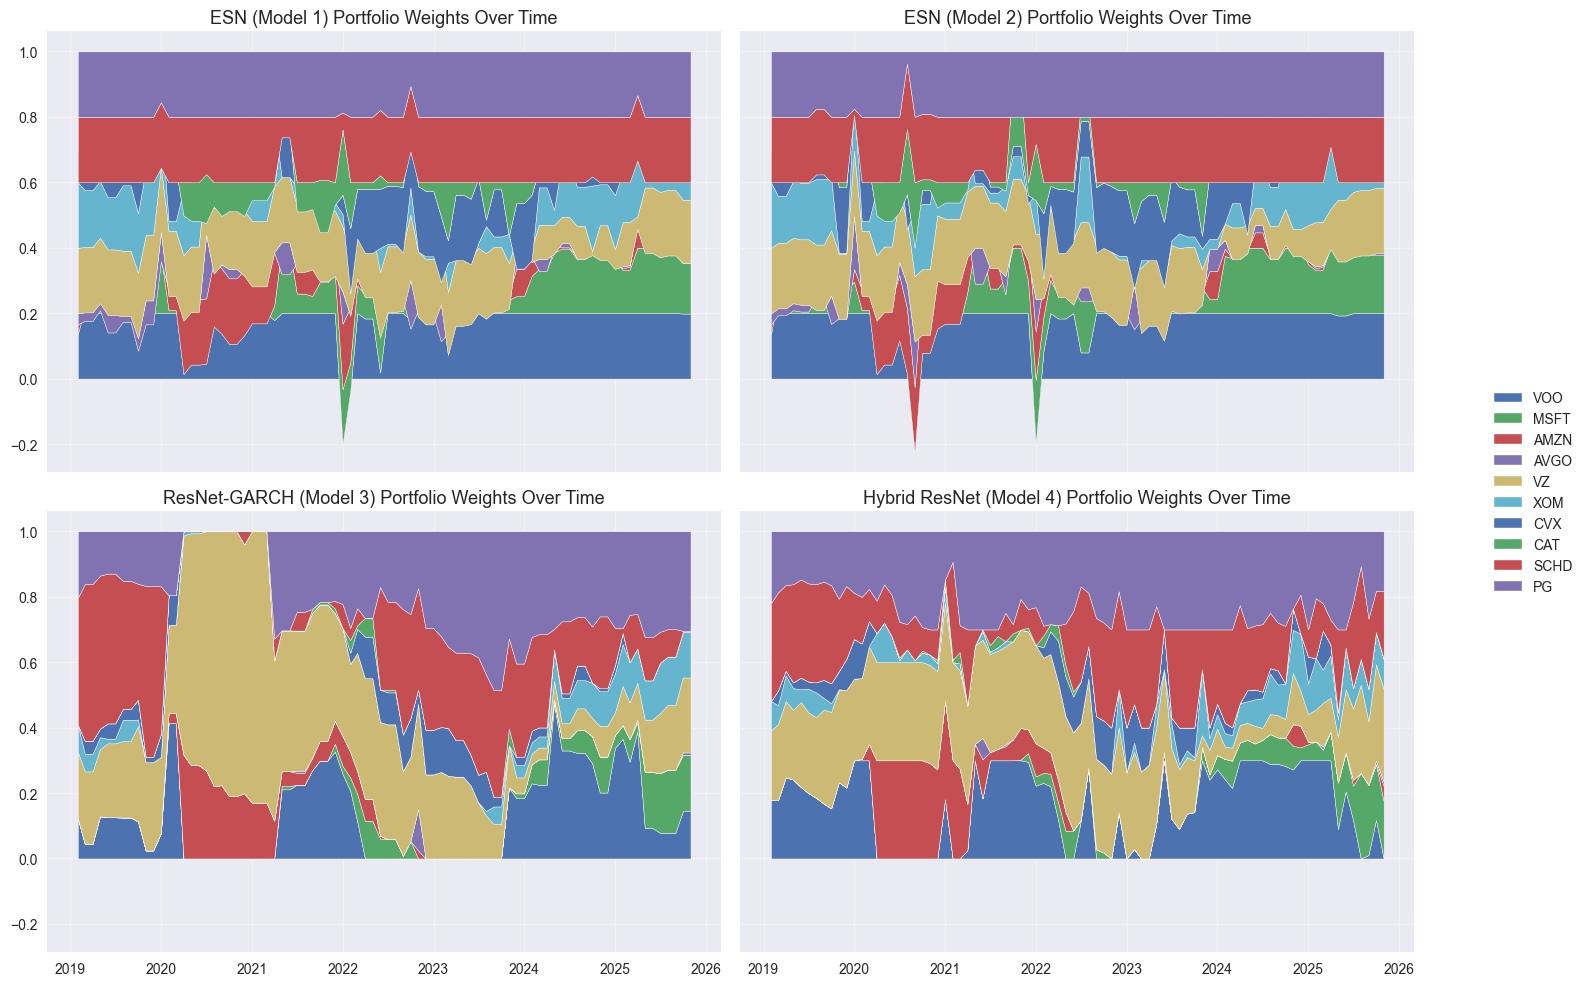

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharex=True, sharey=True)

models = [
    (w1, "ESN (Model 1) Portfolio Weights Over Time"),
    (w2, "ESN (Model 2) Portfolio Weights Over Time"),
    (w3, "ResNet-GARCH (Model 3) Portfolio Weights Over Time"),
    (w4, "Hybrid ResNet (Model 4) Portfolio Weights Over Time")
]

axes = axes.flatten()

for ax, (w, title) in zip(axes, models):

    ax.stackplot(w.index, w.T, labels=w.columns)
    ax.set_title(title)
    ax.grid(alpha=0.3)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles,labels,loc="center left",bbox_to_anchor=(0.93, 0.5),frameon=False,fontsize=10)
plt.tight_layout(rect=[0,0,0.9,1])
plt.show()